In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
confirmedDeaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
confirmedDeaths = confirmedDeaths.drop(axis=1, labels=['Lat', 'Long', 'Province/State'])

In [3]:
# confirmedCases = pd.read_csv('time_series_2019-ncov-Confirmed.csv')
# confirmedCases = confirmedCases.drop(axis=1, labels=['Lat', 'Long', 'Province/State'])

In [4]:
# grouped = confirmedCases.groupby('Country/Region').sum()
groupedDeaths = confirmedDeaths.groupby('Country/Region').sum()

In [6]:
# casesItalyUK = grouped.loc[['Italy', 'United Kingdom']]
deathsItalyUK = groupedDeaths.loc[['Italy', 'United Kingdom', 'China', 'Spain']].T
deathsItalyUK.index = pd.to_datetime(deathsItalyUK.index, format='%m/%d/%y')
deathsItalyUK.describe()

Country/Region,Italy,United Kingdom,China,Spain
count,60.000000,60.000000,60.000000,60.000000
mean,474.716667,13.633333,1881.216667,92.883333
std,1062.498400,42.572358,1222.672068,263.179071
min,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,615.500000,0.000000
50%,0.500000,0.000000,2238.000000,0.000000
75%,206.000000,2.000000,3051.000000,6.250000
max,4825.000000,234.000000,3259.000000,1375.000000


In [7]:
# casesDensity = casesItalyUK.copy()
# deathsDensity = deathsItalyUK.copy()
# casesDensity.loc['Italy'] = casesDensity.loc['Italy'] / 60486
# casesDensity.loc['United Kingdom'] = casesDensity.loc['United Kingdom'] / 67787
# casesDensity.T.plot()
# deathsDensity.loc['Italy'] = casesDensity.loc['Italy'] / 60486
# deathsDensity.loc['United Kingdom'] = casesDensity.loc['United Kingdom'] / 67787
# deathsDensity.T.plot()
# casesDensity.index = pd.to_datetime(casesDensity.index, format='%m/%d/%y')
# deathsDensity.index = pd.to_datetime(deathsDensity.index, format='%m/%d/%y')

In [8]:
# deathsItalyUK['France'] > 0

In [9]:
daysSinceFirstDeath = pd.DataFrame()
daysSinceFirstDeath['China'] = deathsItalyUK['China']

deaths = deathsItalyUK['Italy'].loc[deathsItalyUK.index > '2/21/20'].values
daysSinceFirstDeath['Italy'] = np.nan
daysSinceFirstDeath.iloc[0:len(deaths), daysSinceFirstDeath.columns.get_loc('Italy')] = deaths

daysSinceFirstDeath['United Kingdom'] = np.nan
deaths = deathsItalyUK['United Kingdom'].loc[deathsItalyUK.index > '3/5/20'].values
daysSinceFirstDeath.iloc[0:len(deaths), daysSinceFirstDeath.columns.get_loc('United Kingdom')] = deaths

deaths = deathsItalyUK['Spain'].loc[deathsItalyUK.index > '2020-03-03'].values
daysSinceFirstDeath['Spain'] = np.nan
daysSinceFirstDeath.iloc[0:len(deaths), daysSinceFirstDeath.columns.get_loc('Spain')] = deaths

# deaths = deathsItalyUK['Germany'].loc[deathsItalyUK.index > '2020-03-09'].values
# daysSinceFirstDeath['Germany'] = np.nan
# daysSinceFirstDeath.iloc[0:len(deaths), daysSinceFirstDeath.columns.get_loc('Germany')] = deaths

# deaths = deathsItalyUK['France'].loc[deathsItalyUK.index > '2020-02-15'].values
# daysSinceFirstDeath['France'] = np.nan
# daysSinceFirstDeath.iloc[0:len(deaths), daysSinceFirstDeath.columns.get_loc('France')] = deaths

daysSinceFirstDeath = daysSinceFirstDeath.reset_index(drop=True)

In [11]:
deathRateByDate = daysSinceFirstDeath.copy()
deathRateByDate = deathRateByDate.fillna(method='pad')
deathRateByDate.iloc[0:-1] = deathRateByDate.iloc[1:].values - deathRateByDate.iloc[0:-1].values
deathRateByDate.drop(deathRateByDate.tail(1).index,inplace=True)
deathRateByDate = deathRateByDate.replace(0, np.nan).fillna(method='bfill')

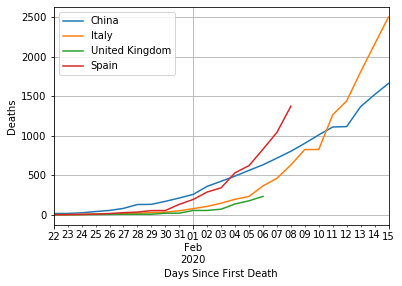

In [12]:
ax = daysSinceFirstDeath.iloc[0:25].plot()
ax.set(xlabel="Days Since First Death", ylabel="Deaths")
ax.grid()
ax.get_figure().savefig('Covid-19 Deaths (Total)- zoomed.png', dpi=600, bbox_inches='tight')

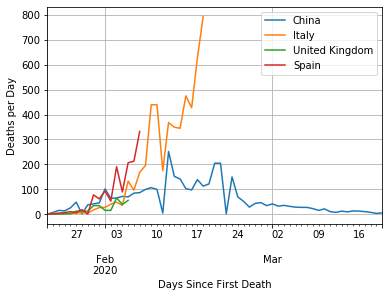

In [13]:
ax = deathRateByDate.plot()
ax.set(xlabel="Days Since First Death", ylabel="Deaths per Day")
ax.grid()
ax.get_figure().savefig('Covid-19 Deaths (Per Day).png', dpi=600, bbox_inches='tight')

In [38]:
daysSinceFirstDeath['France']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
6       1.0
7       1.0
8       1.0
9       1.0
10      2.0
11      2.0
12      2.0
13      2.0
14      2.0
15      3.0
16      4.0
17      4.0
18      6.0
19      9.0
20     11.0
21     19.0
22     19.0
23     33.0
24     48.0
25     48.0
26     79.0
27     91.0
28     91.0
29    148.0
30    148.0
31    148.0
32    243.0
33    450.0
34      NaN
35      NaN
36      NaN
37      NaN
38      NaN
39      NaN
40      NaN
41      NaN
42      NaN
43      NaN
44      NaN
45      NaN
46      NaN
47      NaN
48      NaN
49      NaN
50      NaN
51      NaN
52      NaN
53      NaN
54      NaN
55      NaN
56      NaN
57      NaN
58      NaN
Name: France, dtype: float64

In [54]:
casesDensity = casesDensity.loc[casesDensity.index > '2020-02-21']
deathsDensity = deathsDensity.loc[casesDensity.index > '2020-02-21']

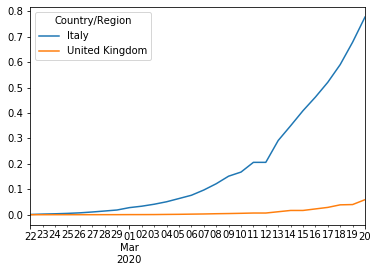

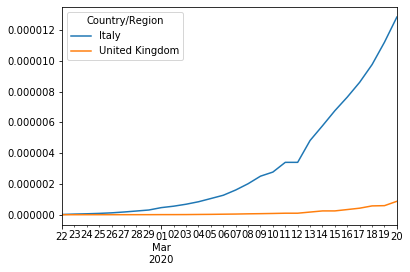

In [55]:
casesDensity.plot()
deathsDensity.plot()